<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('/content/wine.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
data.shape

(178, 14)

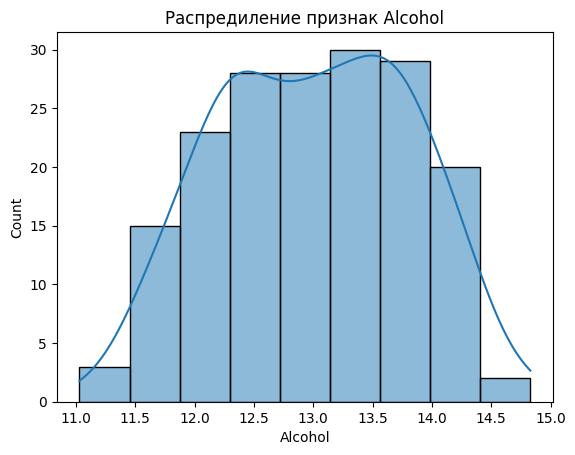

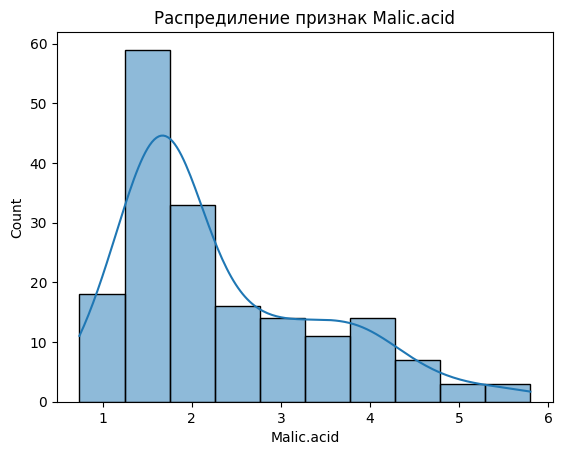

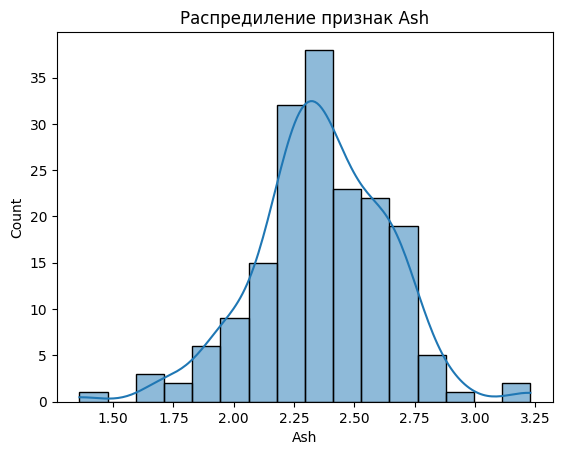

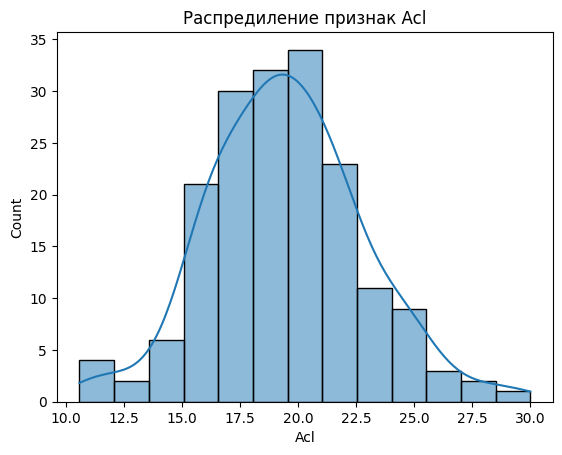

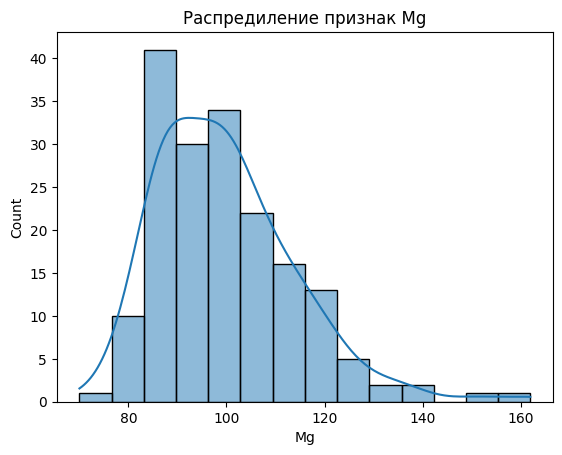

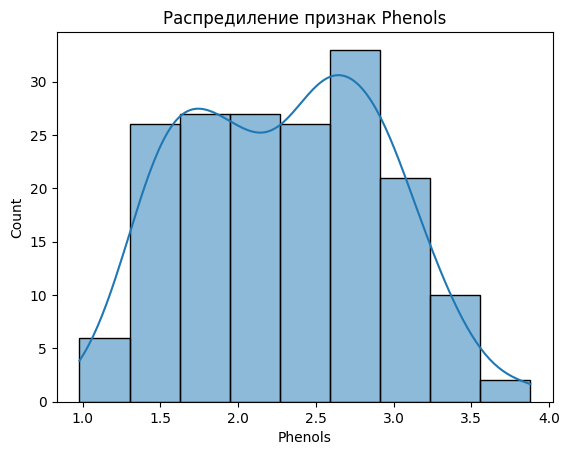

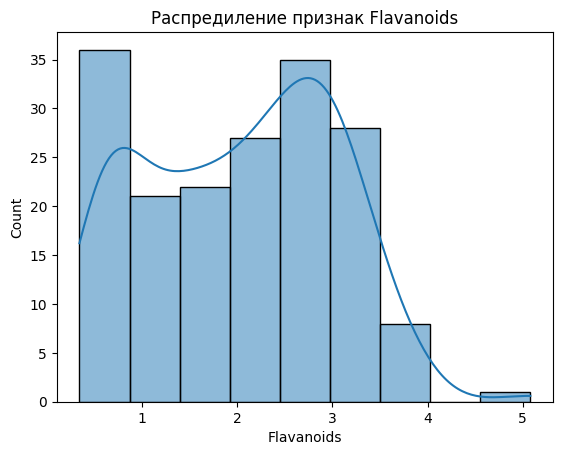

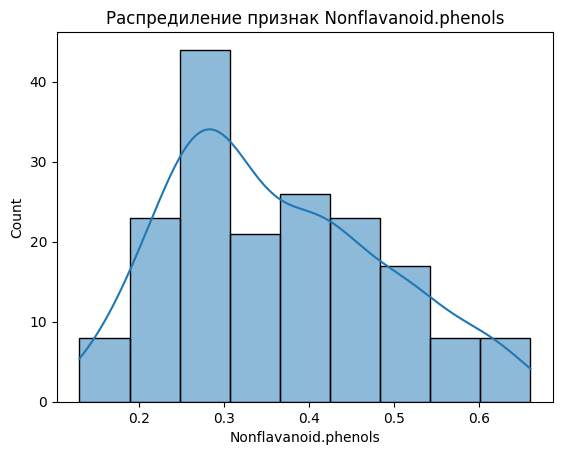

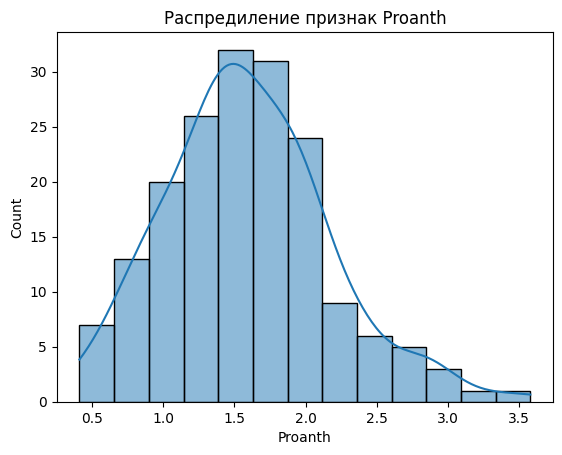

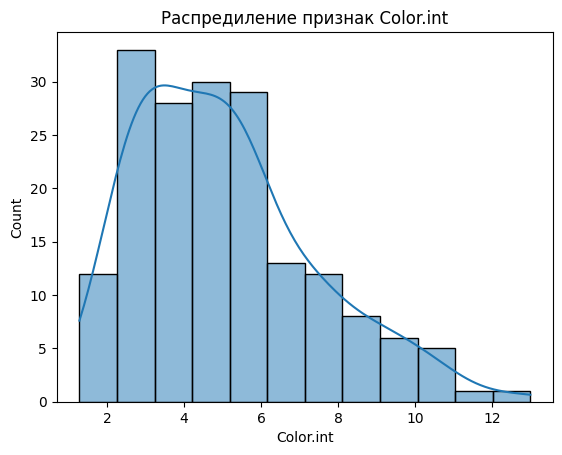

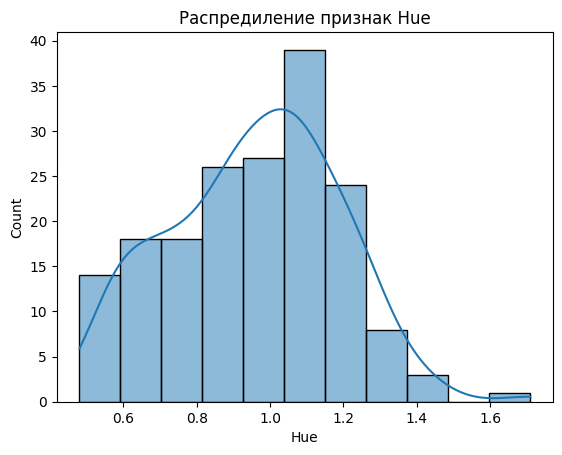

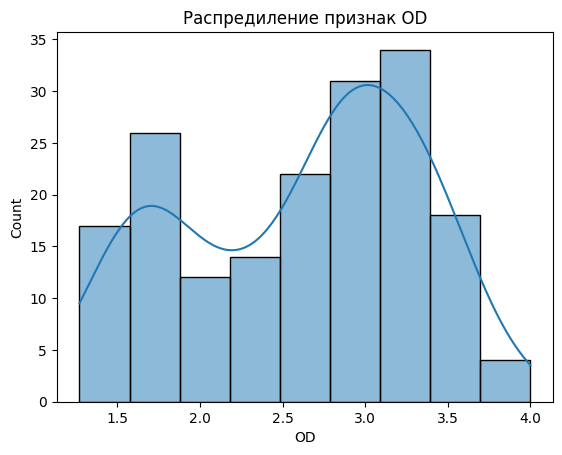

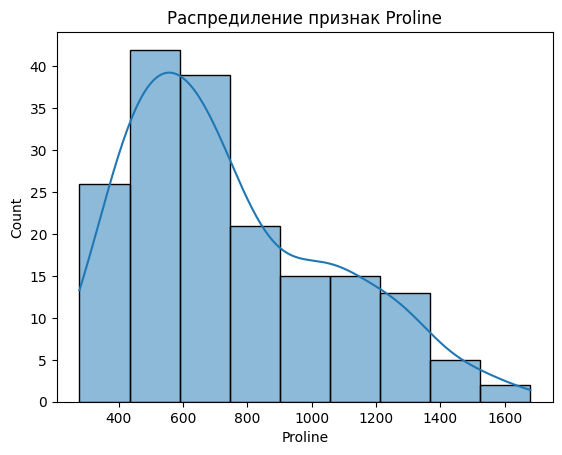

In [24]:
for feature in data.columns[1:]:
  sns.histplot(data=data, x=feature, kde=True)
  plt.title(f'Распредиление признак {feature}')
  plt.show()

In [32]:
print('Пропущенные значения:\n', data.isnull().sum())

Пропущенные значения:
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


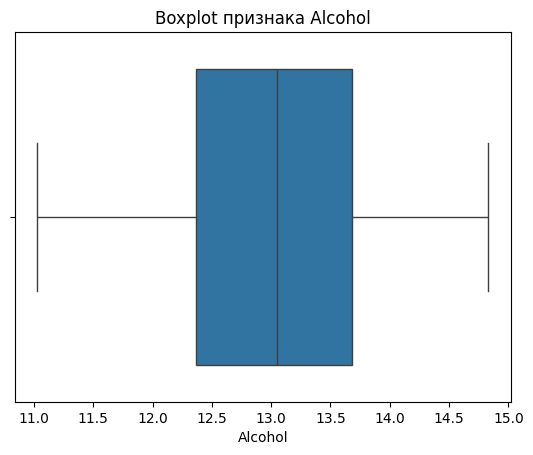

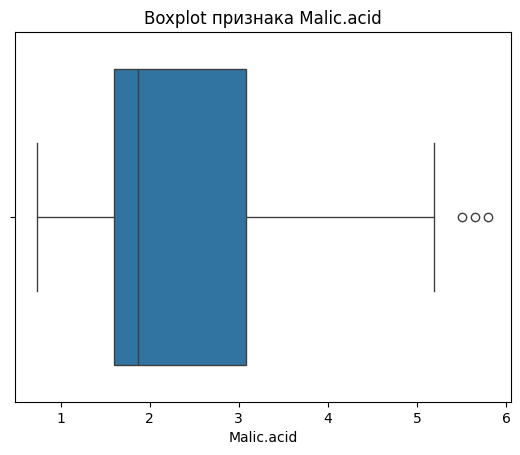

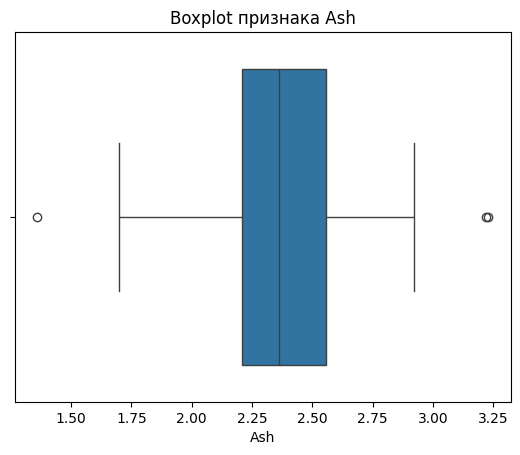

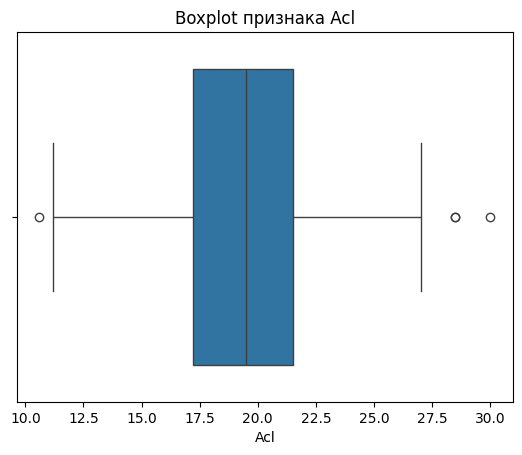

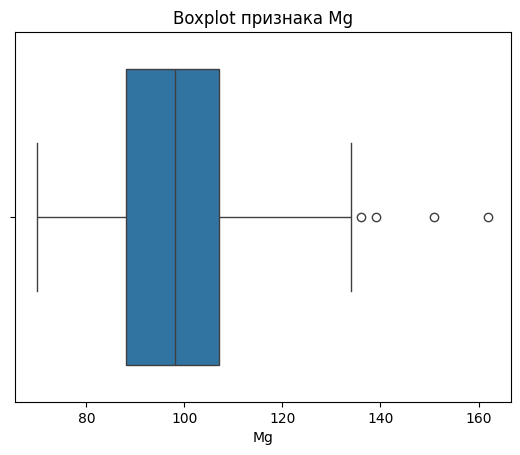

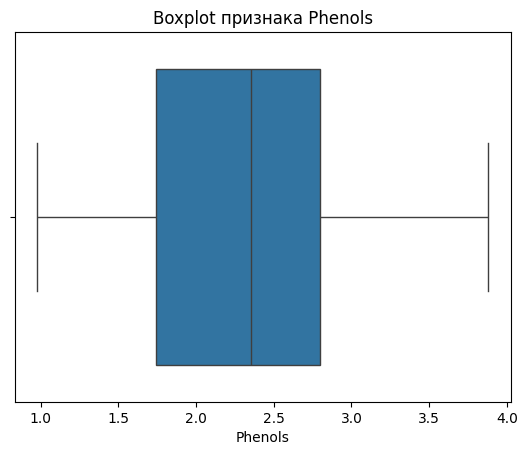

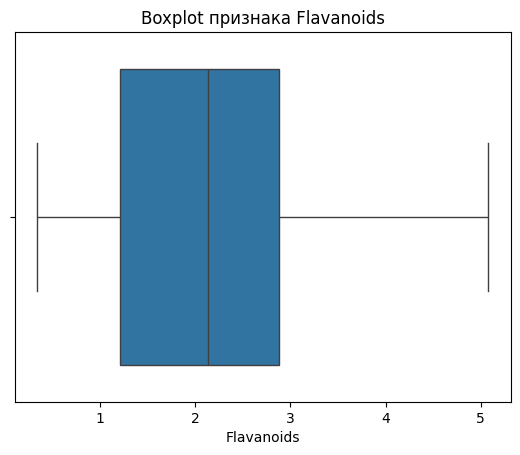

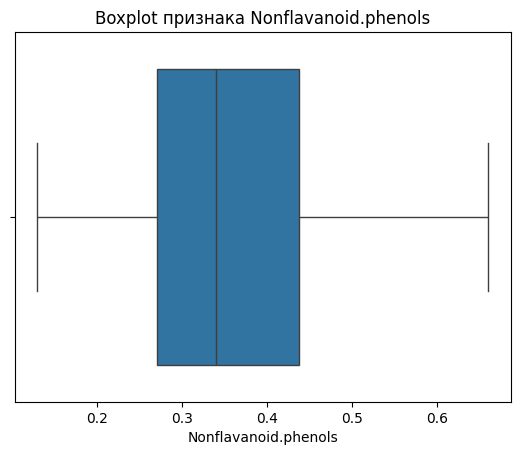

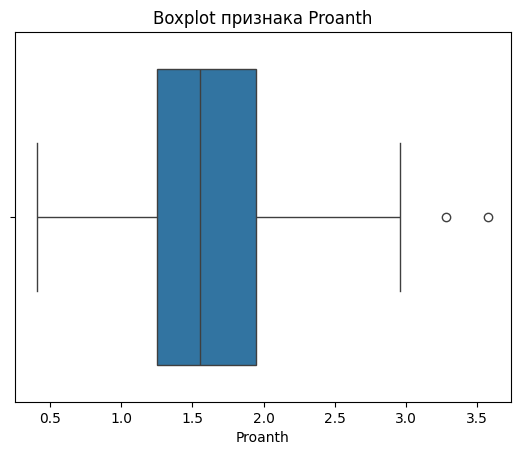

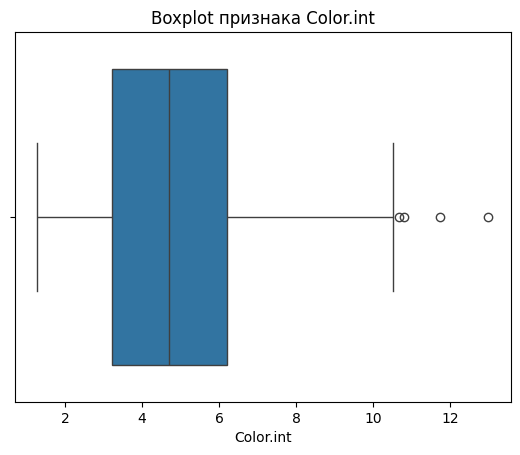

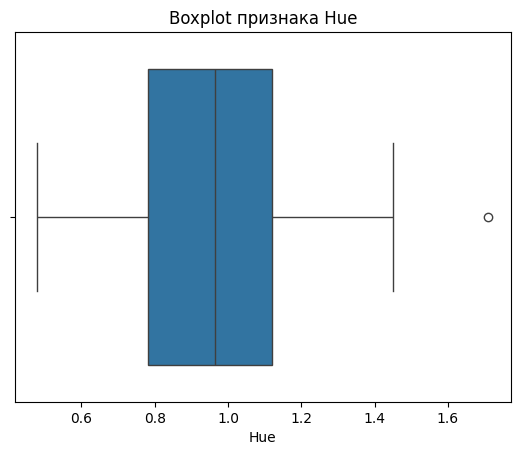

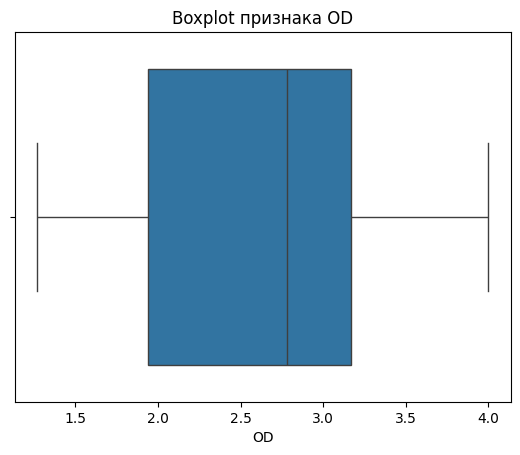

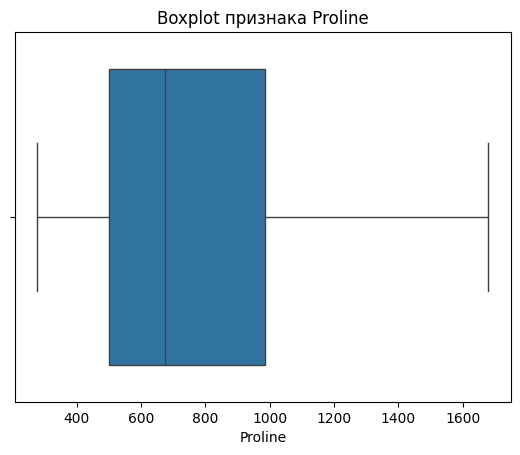

In [34]:
for feature in data.columns[1:]:
  sns.boxplot(data=data, x=feature)
  plt.title(f'Boxplot признака {feature}')
  plt.show()

In [29]:
X = data.drop(['Wine'], axis=1)
y = data['Wine']

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

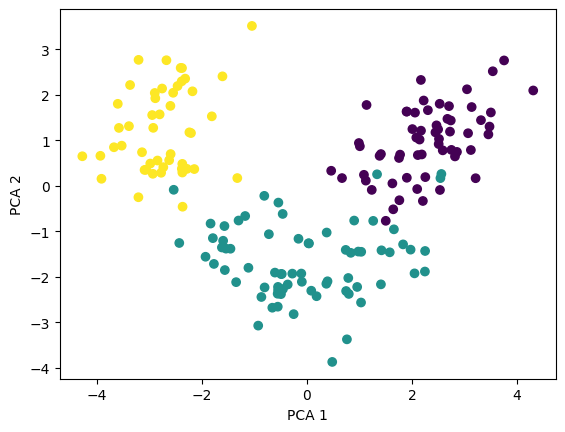

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [44]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [46]:
y_predict = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_predict))
print('Precision: ', precision_score(y_true=y_test, y_pred=y_predict, average='macro'))
print('Recall: ', recall_score(y_true=y_test, y_pred=y_predict, average='macro'))
print('F1: ', f1_score(y_true=y_test, y_pred=y_predict, average='macro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
